## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
X,y = make_classification(n_samples= 10000, n_features=8, n_informative=5, class_sep=2, random_state=42)
df_dataset = pd.DataFrame(X)
df_dataset.head()

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770


In [5]:
type(y)
df_y = pd.DataFrame(y, columns=["Y"])
df_y.head()

,Y
0,0
1,1
2,0
3,0
4,0


In [12]:
X.shape #np.concatenate([X,y], axis = 1) birleştirme, X_new,y_new = np.hsplit(data, [7])

(10000, 8)

In [50]:
# Check duplicate values and missing data.
df_dataset.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [51]:
df_dataset.duplicated().sum()

0

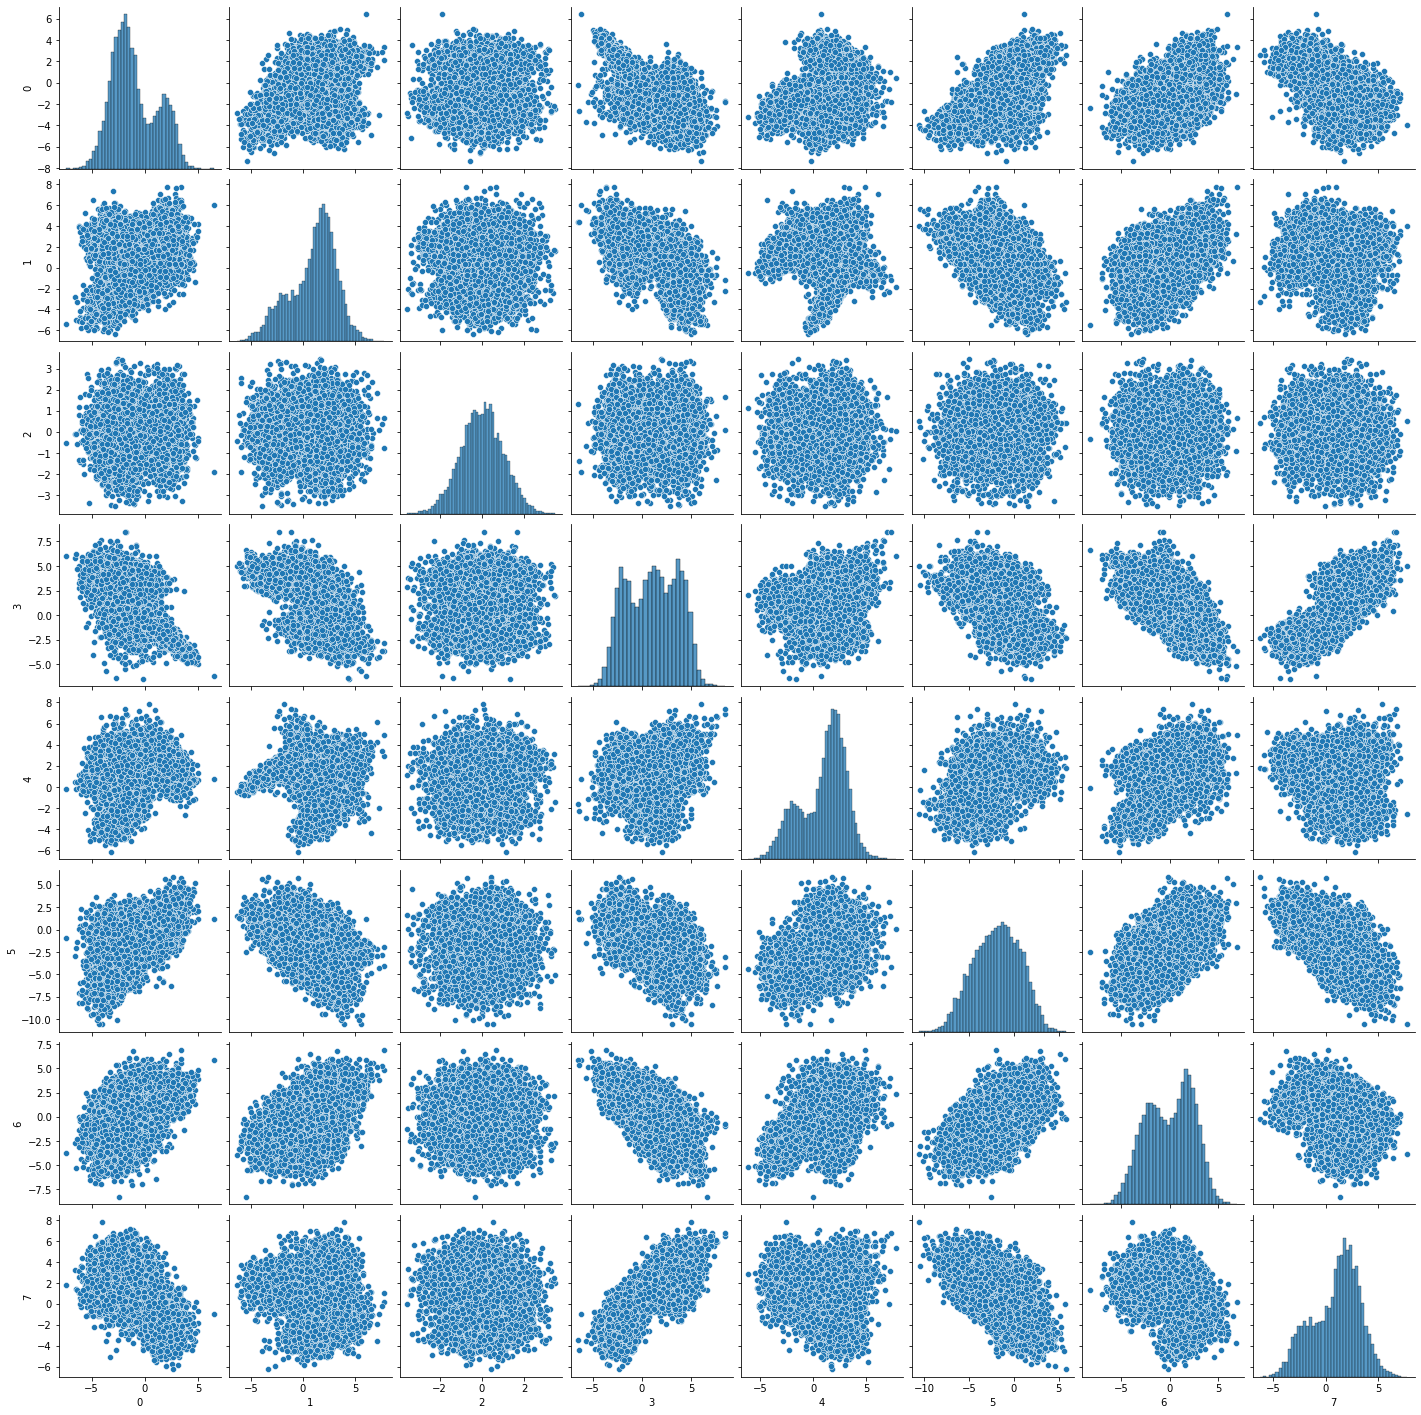

In [52]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(df_dataset)

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

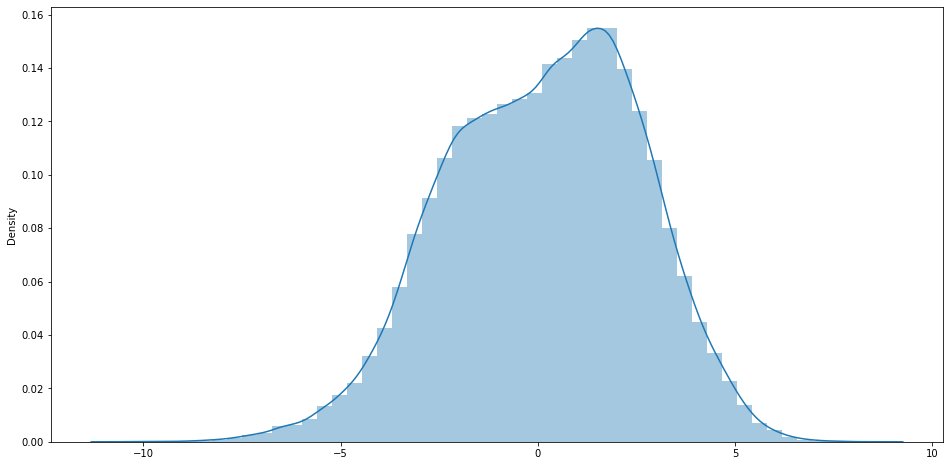

In [53]:
plt.figure(figsize=(16,8))
sns.distplot(df_dataset)

In [54]:
# Draw correlation matrix.
df_dataset.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000


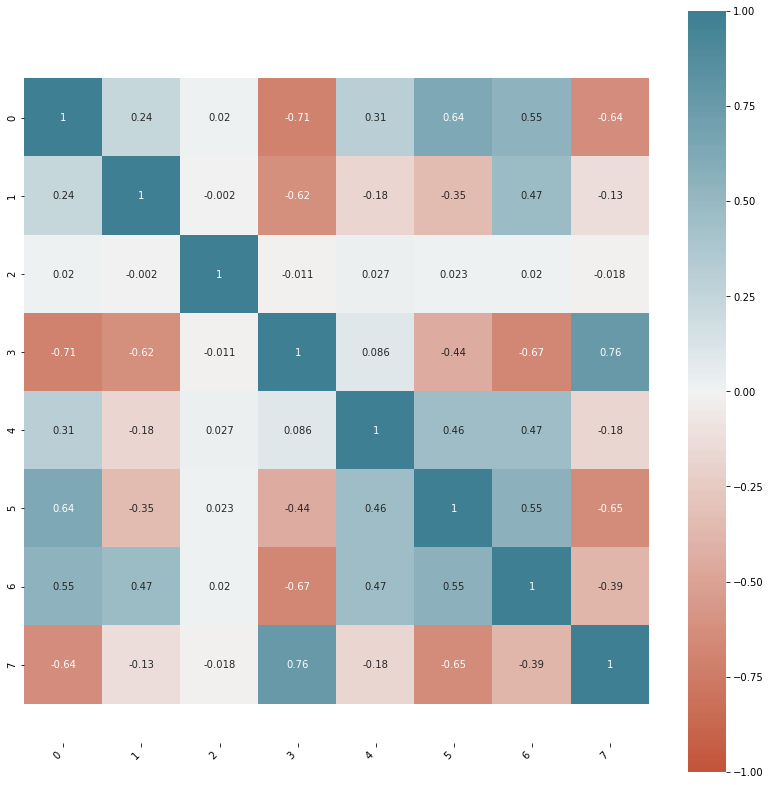

In [55]:
corr = df_dataset.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [3]:
# Handle outliers (you can use IsolationForest, Z-score, IQR) #z skoru

z = np.abs(stats.zscore(df_dataset)) #+-3 ile uğraşmamak için mutlak değer alıyoruz.
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.53763097, 0.00566284,
        1.15220659],
       [1.21562472, 1.62265494, 0.52187207, ..., 0.03314851, 1.40338979,
        0.51777165],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.12249416, 0.48387509,
        0.35998293],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.50960652, 0.53475377,
        0.55105502],
       [0.08336999, 0.15830524, 0.83152777, ..., 1.11728642, 0.99626339,
        0.9651887 ],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.01941697, 1.24352619,
        1.01322073]])

In [6]:
hepsi = pd.concat([df_dataset,df_y], axis=1)
hepsi

,0,1,2,3,4,5,6,7,Y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [7]:
outliers = list(set(np.where(z > 3)[0]))
outliers

[1792,
 8579,
 9091,
 2823,
 5639,
 1552,
 8337,
 7698,
 5013,
 160,
 2720,
 9634,
 5541,
 6696,
 8360,
 3244,
 5806,
 1969,
 5048,
 953,
 9021,
 1214,
 2367,
 7232,
 4417,
 9794,
 1097,
 3915,
 588,
 973,
 1998,
 2124,
 2895,
 3021,
 5451,
 5075,
 725,
 4056,
 8793,
 1242,
 4343,
 6106,
 4062,
 2656,
 4449,
 3938,
 8165,
 745,
 2281,
 7277,
 2673,
 2034,
 627,
 2676,
 4853,
 8052,
 2807,
 8179]

In [8]:
outliers = list(set(np.where(z > 3)[0]))
new_df = hepsi.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df) #buradan index sütununu silelim.

,index,0,1,2,3,4,5,6,7,Y
0,0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...,...
9937,9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9938,9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9939,9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9940,9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


In [9]:
hepsi_new = new_df.drop('index', axis = 1)
hepsi_new.head()

,0,1,2,3,4,5,6,7,Y
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0


In [10]:
#şimdi ikisini ayıralım.
y_new = hepsi_new["Y"]
y_new

0       0
1       1
2       0
3       0
4       0
       ..
9937    0
9938    0
9939    1
9940    1
9941    0
Name: Y, Length: 9942, dtype: int64

In [11]:
X_new = hepsi_new.drop("Y", axis=1)
X_new

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...,...,...
9937,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9938,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9939,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036
9940,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019


In [12]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.3, random_state=42)

In [13]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=8, random_state=42) #max depth ağacın ne kadar daha devam edeceğini söylüyor. 
#mesela 4 olunca, ağaçları kısaltarak traini bir yerde kesti. yani overfitting için kullanılabilecek bir 
#hiperparametreyi düzenleyerek, bunu engelledim ve test tahmin oranını yükselttim.
#burada 8 kullandım. 8 katman oldu ve overfitting sorunu yaşanmadı. Ayrıca tahmin oranı da oldukça yüksek.
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

#decision tree'de hiperparametreler ile algoritmanın çalışmasını iyileştirebiliriz. bu örnekte, max_depth 
#hiperparametresini ayarlayarak, tahmin oranını yükselttim.

Accuracy of train: 0.9867797097284092
Accuracy of test: 0.9792155548105934


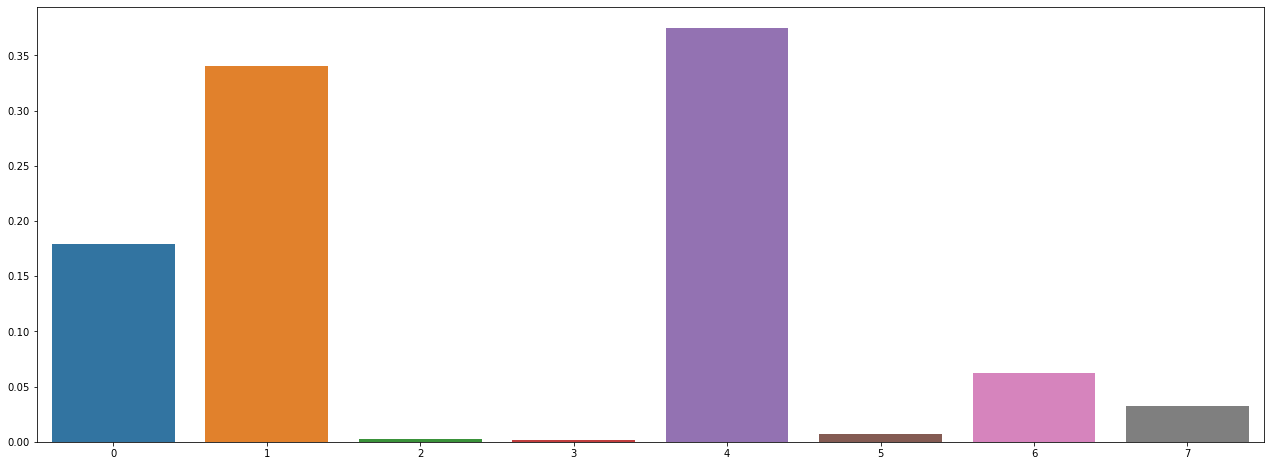

In [26]:
# Visualize feature importances.

#özelliklerimizin ne kadar önemli olduğunu bize gösteriyor. 4.sütun en önemlisi olduğu gözüküyor.
plt.figure(figsize=(22, 8))
importance = clf.feature_importances_
sns.barplot(x=X_new.columns, y=importance)
plt.show()

In [15]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

#Classification Raporu.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1527
           1       0.98      0.98      0.98      1456

    accuracy                           0.98      2983
   macro avg       0.98      0.98      0.98      2983
weighted avg       0.98      0.98      0.98      2983



In [27]:
#Metrikler
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9791521465231245
Recall = 0.9792836093179904
Accuracy = 0.9792155548105934
F1 Score = 0.9792068597373138


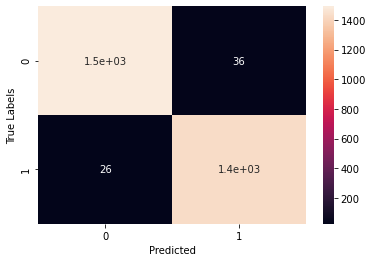

In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(y_test, pred, rownames=['True Labels'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()


In [18]:
!pip install xgboost

In [20]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
import xgboost as xgb

In [61]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':6, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':8}

num_round = 8
model = xgb.train(param, dmatrix_train, num_round)

In [62]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[9.9167985e-01, 7.6061054e-03, 1.1900281e-04, 1.1900281e-04,
        1.1900281e-04, 1.1900281e-04, 1.1900281e-04, 1.1900281e-04],
       [9.9878019e-01, 8.0870953e-04, 6.8526177e-05, 6.8526177e-05,
        6.8526177e-05, 6.8526177e-05, 6.8526177e-05, 6.8526177e-05],
       [2.3390175e-04, 9.9946767e-01, 4.9731785e-05, 4.9731785e-05,
        4.9731785e-05, 4.9731785e-05, 4.9731785e-05, 4.9731785e-05],
       [2.0344257e-02, 9.7859770e-01, 1.7633833e-04, 1.7633833e-04,
        1.7633833e-04, 1.7633833e-04, 1.7633833e-04, 1.7633833e-04],
       [9.9575597e-01, 3.8155776e-03, 7.1407114e-05, 7.1407114e-05,
        7.1407114e-05, 7.1407114e-05, 7.1407114e-05, 7.1407114e-05],
       [3.8911612e-03, 9.9566334e-01, 7.4252101e-05, 7.4252101e-05,
        7.4252101e-05, 7.4252101e-05, 7.4252101e-05, 7.4252101e-05],
       [7.6551037e-04, 9.9904722e-01, 3.1205102e-05, 3.1205102e-05,
        3.1205102e-05, 3.1205102e-05, 3.1205102e-05, 3.1205102e-05],
       [1.7564049e-03, 9.9765056e-01, 9.8

In [63]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([0, 0, 1, ..., 0, 1, 1])

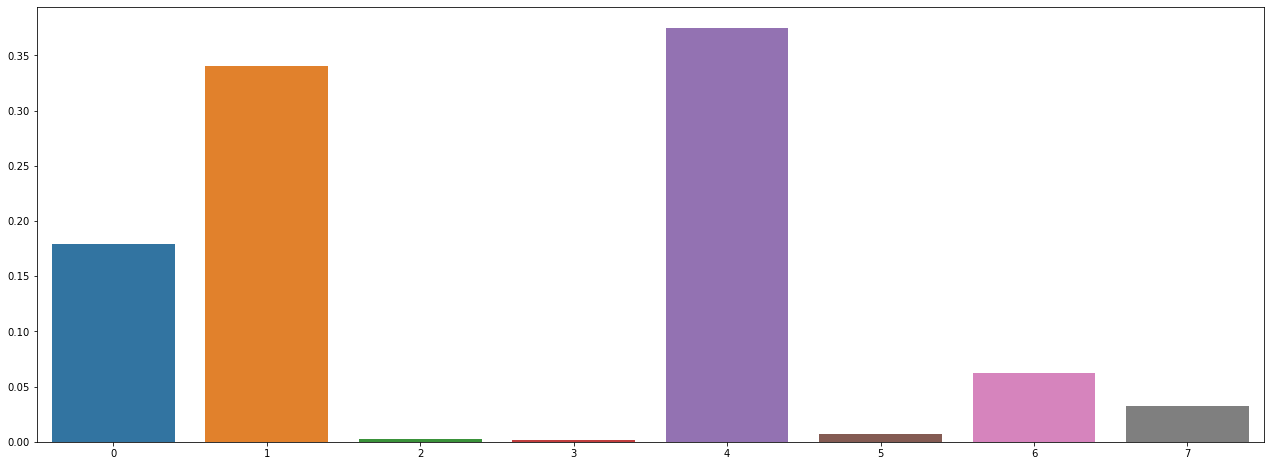

In [65]:
# Visualize feature importances.
plt.figure(figsize=(22, 8))
importance = clf.feature_importances_
sns.barplot(x=X_new.columns, y=importance)
plt.show()

In [64]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9879408465224819
Recall = 0.9879088045222624
Accuracy = 0.9879316124706671


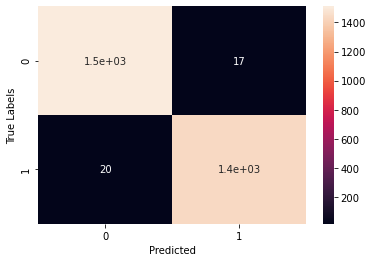

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(y_test, best_preds, rownames=['True Labels'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# Evaluate your result and select best performing algorithm for our case.

Bu ödevde, önce data oluşturdum. Ardından bunu incelendim. Daha sonra tahminlerin güvenilirlik oranlarına baktım. Önce decision tree kullanarak, test ve tahminlerin doğruluk oranlarına baktım. Burada hiperparametreleri düzenleyerek, doğruluk oranlarını arttırdım. Daha sonra XGBoost kullanarak, tekrar test ve tahmin oranlarına baktım. Burada da hiperparametreleri düzenleyerek, doğruluk oranlarını arttırdım. Ancak, hem doğruluk oranı olarak, hem hız olarak XGBoost kullanımı daha mantıklı bir seçenek olarak gözükmekte. Decision tree'de bir noktadan sonra, overfitting hatasına düşme ihtimalimiz var. XGBoost her değişkene göre kazanç skorunu en yüksek yapacak şekilde olası tüm senaryolarda karar ağaçları kurar. Ve bunu, diğerlerine göre kısa sürede yapar. Bu yüzden bunu seçmek daha mantıklı bir tercih.